<a href="https://colab.research.google.com/github/RoTorresT/Covid-19/blob/master/SINADEF_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [242]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import matplotlib.dates as mdates
from google.colab import files
import sys
import numpy as np
import os
import glob
from matplotlib.pyplot import text


#funcion para graficar

#lee
df=pd.read_csv('/content/drive/My Drive/COVID/fallecidos_sinadef.csv', delimiter=';',encoding='latin1') #cambiar fuente
df.columns = ['Num','TIPO SEGURO','SEXO','EDAD','TIEMPO EDAD','ESTADO CIVIL','NIVEL DE INSTRUCCIÓN','COD# UBIGEO DOMICILIO','PAIS DOMICILIO','DEPARTAMENTO DOMICILIO','PROVINCIA DOMICILIO','DISTRITO DOMICILIO','FECHA','AÑO','MES','TIPO LUGAR','INSTITUCION','MUERTE VIOLENTA','NECROPSIA','DEBIDO A (CAUSA A)','CAUSA A (CIE-X)','DEBIDO A (CAUSA B)','CAUSA B (CIE-X)','DEBIDO A (CAUSA C)','CAUSA C (CIE-X)','DEBIDO A (CAUSA D)','CAUSA D (CIE-X)','DEBIDO A (CAUSA E)','CAUSA E (CIE-X)','DEBIDO A (CAUSA F)','CAUSA F (CIE-X)','ASS','ASS','ASS','ASS']
df=df.drop(columns="ASS")
df=df.drop(index=[0, 1])

#Datos por departamento

df.AMAZONAS       = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'AMAZONAS']

df.ANCASH         = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'ANCASH']

df.APURIMAC       = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'APURIMAC']

df.AREQUIPA       = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'AREQUIPA']

df.AYACUCHO       = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'AYACUCHO']

df.CAJAMARCA      = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'CAJAMARCA']

df.CALLAO         = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'CALLAO']

df.CUSCO          = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'CUSCO']

df.HUANCAVELICA   = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'HUANCAVELICA']

df.HUANUCO        = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'HUANUCO']

df.ICA            = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'ICA']

df.JUNIN          = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'JUNIN']

df.LA_LIBERTAD    = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'LA LIBERTAD']

df.LAMBAYEQUE     = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'LAMBAYEQUE']

df.LIMA           = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'LIMA']

df.LORETO         = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'LORETO']

df.MADRE_DE_DIOS  = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'MADRE DE DIOS']

df.MOQUEGUA       = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'MOQUEGUA']

df.PASCO          = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'PASCO']

df.PIURA          = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'PIURA']

df.PUNO           = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'PUNO']

df.SAN_MARTIN     = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'SAN MARTIN']

df.TACNA     = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'TACNA']

df.TUMBES         = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'TUMBES']

df.UCAYALI        = df.loc[df['DEPARTAMENTO DOMICILIO'] == 'UCAYALI']

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-acces

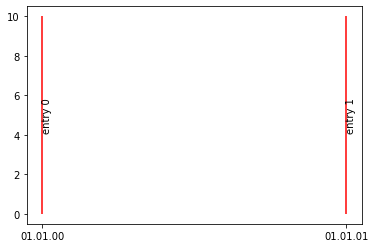

In [241]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
from matplotlib.pyplot import text

fig, ax = plt.subplots(1,1)
sample_dates = np.array([datetime.datetime(2000,1,1), datetime.datetime(2001,1,1)])
sample_dates = mdates.date2num(sample_dates)
plt.vlines(x=sample_dates, ymin=0, ymax=10, color = 'r')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))

for i, x in enumerate(sample_dates):
    text(x, 5, "entry %d" % i, rotation=90, verticalalignment='center')

plt.show()

In [118]:
#aumento de fechas +1 a todo, luedo se hacce -1 a todo
#calculo de tamaño vector patron. peru

#Peru
df_fecha = pd.DataFrame(df["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Peru = df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Peru_length = len(df_fecha_contadas_Peru)
estado_Peru = True
print('Peru '+ str(df_fecha_contadas_Peru_length))

start_dt = datetime.date(2017, 1, 1)
d = datetime.timedelta(days = df_fecha_contadas_Peru_length-1)
a = start_dt + d

#Aumento Generado

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + datetime.timedelta(n)

lista_departamentos = ['AMAZONAS','ANCASH','APURIMAC','AREQUIPA','AYACUCHO','CAJAMARCA','CALLAO','CUSCO','HUANCAVELICA','HUANUCO','ICA','JUNIN','LA LIBERTAD','LAMBAYEQUE','LIMA','LORETO','MADRE DE DIOS','MOQUEGUA','PASCO','PIURA','PUNO','SAN MARTIN','TACNA','TUMBES','UCAYALI']
start_dt = datetime.date(2017, 1, 1)
end_dt = a

aumento_departamento_fechas_csv=np.linspace(1,df_fecha_contadas_Peru_length,df_fecha_contadas_Peru_length)

i=0
for x in lista_departamentos:

  for dt in daterange(start_dt, end_dt):
      print(';;;;;;;;;'+x + ';;;' + dt.strftime("%Y-%m-%d")+';;;;;;;;;;;;;;;;;;;;;;',   file=open('/content/drive/My Drive/COVID/fallecidos_sinadef_aumento.csv', 'a'))


Peru 1327


In [82]:
#Ragi. Quiero juntar fallecidos_sinadef.csv con fallecidos_sinadef_aumento.csv en uno nuevo.
#aumento tiene todas las fechas, por ya solo a todo le bajo 1 y queda biem
reader = csv.reader(open("/content/drive/My Drive/COVID/fallecidos_sinadef.csv"),)
reader1 = csv.reader(open("/content/drive/My Drive/COVID/fallecidos_sinadef_aumento.csv"))
f = open("combined.csv", "w")
writer = csv.writer(f)

for row in reader:
    writer.writerow(row)
for row in reader1:
    writer.writerow(row)
f.close()

TypeError: ignored

In [201]:
#longitud vector de muertes sin limpiar

#Peru
df_fecha = pd.DataFrame(df["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Peru = df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Peru_length = len(df_fecha_contadas_Peru)
estado_Peru = True
print('Peru '+ str(df_fecha_contadas_Peru_length))

#Amazonas
df_fecha = pd.DataFrame(df.AMAZONAS["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Amazonas=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Amazonas_length = len(df_fecha_contadas_Amazonas)

if df_fecha_contadas_Peru_length == df_fecha_contadas_Amazonas_length:
  estado = 'bien'
  estado_Amazonas = True
else:
  estado = 'revisar'
  estado_Amazonas = False

print('Amazonas '+ str(df_fecha_contadas_Amazonas_length)+ ' ' +str(estado))

#Ancash 
df_fecha = pd.DataFrame(df.ANCASH["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Ancash=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Ancash_length = len(df_fecha_contadas_Ancash)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Ancash_length:
  estado = 'bien'
  estado_Ancash = True
else:
  estado = 'revisar'
  estado_Ancash = False
  
print('Ancash '+ str(df_fecha_contadas_Ancash_length)+ ' ' +str(estado))

#Print revision: relleno de datos atrasados
#print(df_fecha_contadas_Ancash)

#Apurimac 
df_fecha = pd.DataFrame(df.APURIMAC["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Apurimac=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Apurimac_length = len(df_fecha_contadas_Apurimac)

if df_fecha_contadas_Peru_length == df_fecha_contadas_Apurimac_length:
  estado = 'bien'
  estado_Apurimac = True
else:
  estado = 'revisar'
  estado_Apurimac = False

print('Apurimac '+ str(df_fecha_contadas_Apurimac_length)+ ' ' +str(estado))

#Arequipa
df_fecha = pd.DataFrame(df.AREQUIPA["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Arequipa=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Arequipa_length = len(df_fecha_contadas_Arequipa)

if df_fecha_contadas_Peru_length == df_fecha_contadas_Arequipa_length:
  estado = 'bien'
  estado_Arequipa = True
else:
  estado = 'revisar'
  estado_Arequipa = False

print('Arequipa '+ str(df_fecha_contadas_Arequipa_length)+ ' ' +str(estado))

#Ayacucho
df_fecha = pd.DataFrame(df.AYACUCHO["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Ayacucho=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Ayacucho_length = len(df_fecha_contadas_Ayacucho)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Ayacucho_length:
  estado = 'bien'
  estado_Ayacucho = True
else:
  estado = 'revisar'
  estado_Ayacucho = False

print('Ayacucho '+ str(df_fecha_contadas_Ayacucho_length)+ ' ' +str(estado))

#Cajamarca
df_fecha = pd.DataFrame(df.CAJAMARCA["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Cajamarca=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Cajamarca_length = len(df_fecha_contadas_Cajamarca)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Cajamarca_length:
  estado = 'bien'
  estado_Cajamarca = True
else:
  estado = 'revisar'
  estado_Cajamarca = False

print('Cajamarca '+ str(df_fecha_contadas_Cajamarca_length)+ ' ' +str(estado))

#Callao
df_fecha = pd.DataFrame(df.CALLAO["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Callao=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Callao_length = len(df_fecha_contadas_Callao)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Callao_length:
  estado = 'bien'
  estado_Callao = True
else:
  estado = 'revisar'
  estado_Callao = False
print('Callao '+ str(df_fecha_contadas_Callao_length)+ ' ' +str(estado))

#Cusco
df_fecha = pd.DataFrame(df.CUSCO["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Cusco=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Cusco_length = len(df_fecha_contadas_Cusco)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Cusco_length:
  estado = 'bien'
  estado_Cusco = True
else:
  estado = 'revisar'
  estado_Cusco = False

print('Cusco '+ str(df_fecha_contadas_Cusco_length)+ ' ' +str(estado))

#Hancavelica
df_fecha = pd.DataFrame(df.HUANCAVELICA["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Huancavelica=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Huancavelica_length = len(df_fecha_contadas_Huancavelica)

if df_fecha_contadas_Peru_length == df_fecha_contadas_Huancavelica_length:
  estado = 'bien'
  estado_Huancavelica = True
else:
  estado= 'revisar'
  estado_Huancavelica = False

print('Hancavelica '+ str(df_fecha_contadas_Huancavelica_length)+ ' ' +str(estado))

#Huanuco 
df_fecha = pd.DataFrame(df.HUANUCO["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Huanuco=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Huanuco_length = len(df_fecha_contadas_Huanuco)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Huanuco_length:
  estado = 'bien'
  estado_Huanuco = True
else:
  estado = 'revisar'
  estado_Huanuco = False
print('Huanuco '+ str(df_fecha_contadas_Huanuco_length)+ ' ' +str(estado))

#Ica
df_fecha = pd.DataFrame(df.ICA["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Ica=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Ica_length = len(df_fecha_contadas_Ica)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Ica_length:
  estado = 'bien'
  estado_Ica = True
else:
  estado= 'revisar'
  estado_Ica = False

print('Ica '+ str(df_fecha_contadas_Ica_length)+ ' ' +str(estado))

#Junin
df_fecha = pd.DataFrame(df.JUNIN["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Junin=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Junin_length = len(df_fecha_contadas_Junin)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Junin_length:
  estado = 'bien'
  estado_Junin = True
else:
  estado = 'revisar'
  estado_Junin = False

print('Junin '+ str(df_fecha_contadas_Junin_length)+ ' ' +str(estado))

#La Libertad
df_fecha = pd.DataFrame(df.LA_LIBERTAD["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_La_Libertad=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_La_Libertad_length = len(df_fecha_contadas_La_Libertad)


if df_fecha_contadas_Peru_length == df_fecha_contadas_La_Libertad_length:
  estado = 'bien'
  estado_La_Libertad = True
else:
  estado= 'revisar'
  estado_La_Libertad=False

print('La Libertad '+ str(df_fecha_contadas_La_Libertad_length)+ ' ' +str(estado))

#Lambayeque 
df_fecha = pd.DataFrame(df.LAMBAYEQUE["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Lambayeque=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Lambayeque_length = len(df_fecha_contadas_Lambayeque)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Lambayeque_length:
  estado = 'bien'
  estado_Lambayeque = True
else:
  estado = 'revisar'
  estado_Lambayeque = False

print('Lambayeque '+ str(df_fecha_contadas_Lambayeque_length)+ ' ' +str(estado))

#LIMA 
df_fecha = pd.DataFrame(df.LIMA["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Lima=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Lima_length = len(df_fecha_contadas_Lima)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Lima_length:
  estado = 'bien'
  estado_Lima = True
else:
  estado = 'revisar'
  estado_Lima = False

print('Lima '+ str(df_fecha_contadas_Lima_length)+ ' ' +str(estado))

#Loreto
df_fecha = pd.DataFrame(df.LORETO["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Loreto=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Loreto_length = len(df_fecha_contadas_Loreto)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Loreto_length:
  estado = 'bien'
  estado_Loreto = True
else:
  estado = 'revisar'
  estado_Loreto = False

print('Loreto '+ str(df_fecha_contadas_Loreto_length)+ ' ' +str(estado))

#Madre de Dios 
df_fecha = pd.DataFrame(df.MADRE_DE_DIOS["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Madre_De_Dios=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Madre_De_Dios_length = len(df_fecha_contadas_Madre_De_Dios)

if df_fecha_contadas_Peru_length == df_fecha_contadas_Madre_De_Dios_length:
  estado = 'bien'
  estado_Madre_De_Dios = True
else:
  estado= 'revisar'
  estado_Madre_De_Dios = False
print('Madre de Dios '+ str(df_fecha_contadas_Madre_De_Dios_length)+ ' ' +str(estado))

#Moquegua 
df_fecha = pd.DataFrame(df.MOQUEGUA["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Moquegua=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Moquegua_length = len(df_fecha_contadas_Moquegua)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Moquegua_length:
  estado = 'bien'
  estado_Moquegua = True
else:
  estado = 'revisar'
  estado_Moquegua = False
print('Moquegua '+ str(df_fecha_contadas_Moquegua_length)+ ' ' +str(estado))

#PASCO 
df_fecha = pd.DataFrame(df.PASCO["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Pasco=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Pasco_length = len(df_fecha_contadas_Pasco)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Pasco_length:
  estado = 'bien'
  estado_Pasco = True
else:
  estado = 'revisar'
  estado_Pasco = False

print('Pasco '+ str(df_fecha_contadas_Pasco_length)+ ' ' +str(estado))

#Piura
df_fecha = pd.DataFrame(df.PIURA["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Piura=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Piura_length = len(df_fecha_contadas_Piura)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Piura_length:
  estado_= 'bien'
  estado_Piura = True
else:
  estado= 'revisar'
  estado_Piura = False

print('Piura '+ str(df_fecha_contadas_Piura_length)+ ' ' +str(estado))

#Puno
df_fecha = pd.DataFrame(df.PUNO["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Puno=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Puno_length = len(df_fecha_contadas_Puno)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Puno_length:
  estado = 'bien'
  estado_Puno = True
else:
  estado= 'revisar'
  estado_Puno = False

print('Puno '+ str(df_fecha_contadas_Puno_length)+ ' ' +str(estado))

#San Martin
df_fecha = pd.DataFrame(df.SAN_MARTIN ["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_San_Martin=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_San_Martin_length = len(df_fecha_contadas_San_Martin)


if df_fecha_contadas_Peru_length == df_fecha_contadas_San_Martin_length:
  estado_= 'bien'
  estado_San_Martin = True
else:
  estado= 'revisar'
  estado_San_Martin = False

print('San_Martin '+ str(df_fecha_contadas_San_Martin_length)+ ' ' +str(estado))

#Tacna 
df_fecha = pd.DataFrame(df.TACNA["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Tacna=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Tacna_length = len(df_fecha_contadas_Tacna)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Tacna_length:
  estado = 'bien'
  estado_Tacna  = True
else:
  estado = 'revisar'
  estado_Tacna = False

print('Tacna '+ str(df_fecha_contadas_Tacna_length)+ ' ' +str(estado))

#Tumbes
df_fecha = pd.DataFrame(df.TUMBES["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Tumbes=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Tumbes_length = len(df_fecha_contadas_Tumbes)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Tumbes_length:
  estado = 'bien'
  estado_Tumbes = True
else:
  estado = 'revisar'
  estado_Tumbes = False

print('Tumbes '+ str(df_fecha_contadas_Tumbes_length)+ ' ' +str(estado))

#Ucayali
df_fecha = pd.DataFrame(df.UCAYALI["FECHA"].str.split(';', expand=True).stack(), columns=["FECHA"])
df_fecha_contadas_Ucayali=df_fecha.groupby(["FECHA"])["FECHA"].count()
df_fecha_contadas_Ucayali_length = len(df_fecha_contadas_Ucayali)


if df_fecha_contadas_Peru_length == df_fecha_contadas_Ucayali_length:
  estado = 'bien'
  estado_Ucayali = True
else:
  estado = 'revisar'
  estado_Ucayali = False

print('Ucayali '+ str(df_fecha_contadas_Ucayali_length)+ ' ' +str(estado))

Peru 1327
Amazonas 1327 bien
Ancash 1327 bien
FECHA
2017-01-01    12
2017-01-02    14
2017-01-03    10
2017-01-04     8
2017-01-05    11
              ..
2020-08-15    29
2020-08-16    30
2020-08-17    45
2020-08-18    18
2020-08-19    10
Name: FECHA, Length: 1327, dtype: int64
Apurimac 1327 bien
Arequipa 1327 bien
Ayacucho 1327 bien
Cajamarca 1327 bien
Callao 1327 bien
Cusco 1327 bien
Hancavelica 1327 bien
Huanuco 1327 bien
Ica 1327 bien
Junin 1327 bien
La Libertad 1327 bien
Lambayeque 1327 bien
Lima 1327 bien
Loreto 1327 bien
Madre de Dios 1327 bien
Moquegua 1327 bien
Pasco 1327 bien
Piura 1327 bien
Puno 1327 bien
San_Martin 1327 bien
Tacna 1327 bien
Tumbes 1327 bien
Ucayali 1327 bien


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Perú


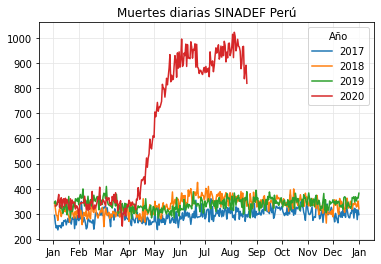

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Amazonas


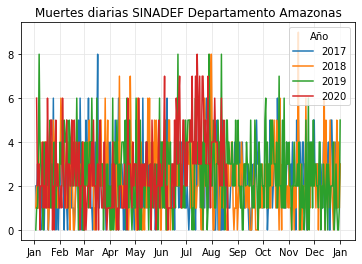

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ancash


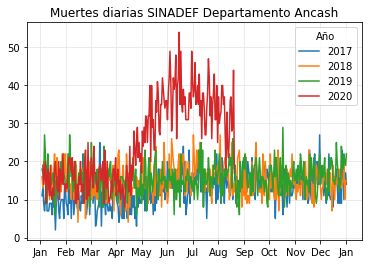

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Apurimac


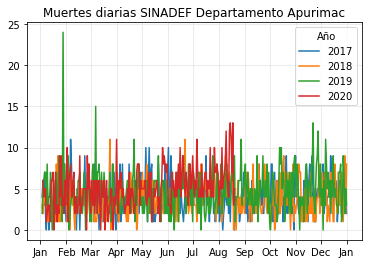

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Arequipa


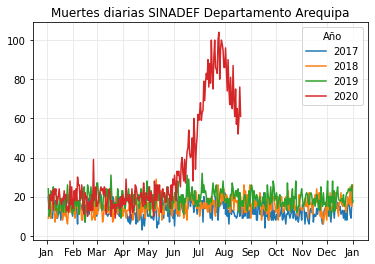

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ayacucho


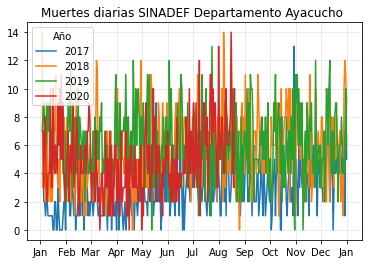

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cajamarca


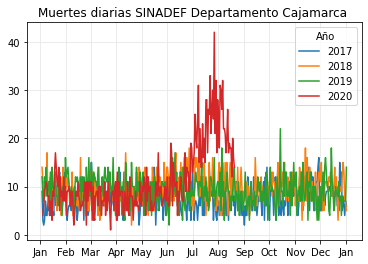

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Callao


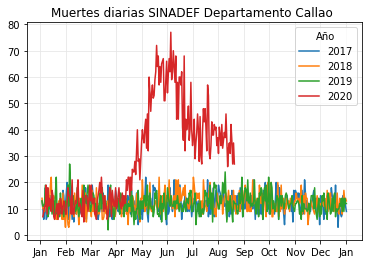

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cusco


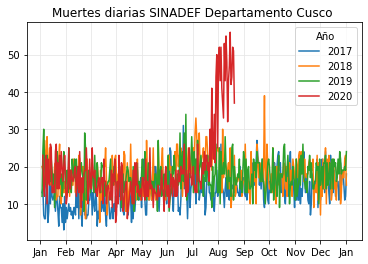

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Huancavelica


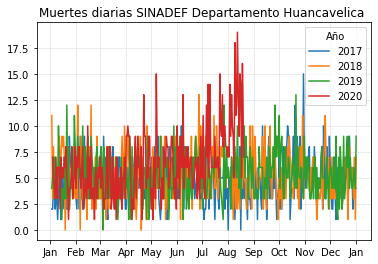

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Huanuco


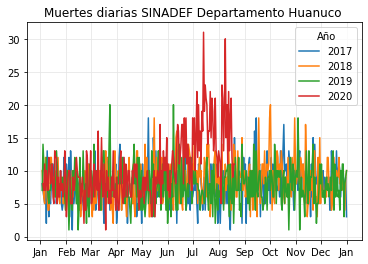

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ica


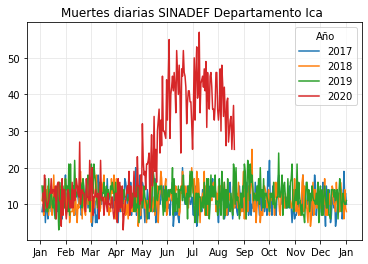

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Junin


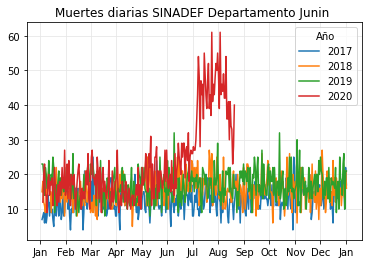

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

La Libertad


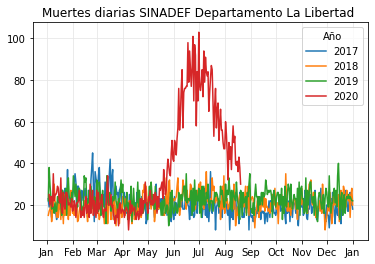

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Lambayeque


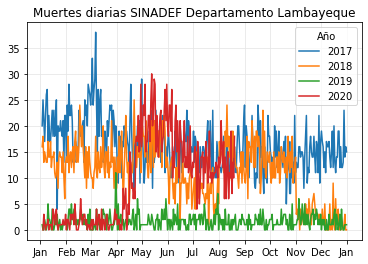

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Lima


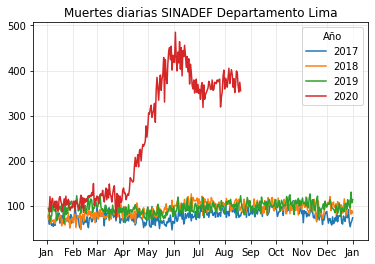

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Loreto


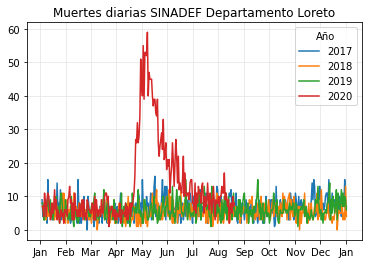

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Madre_De_Dios


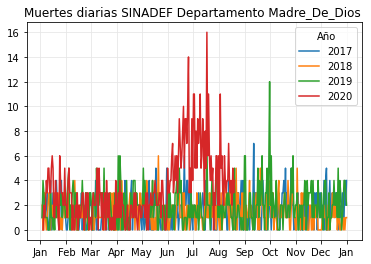

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Moquegua


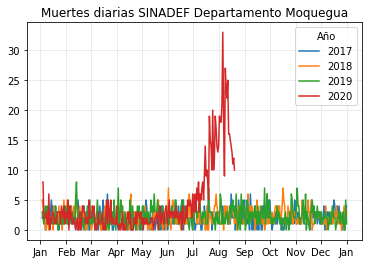

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Pasco


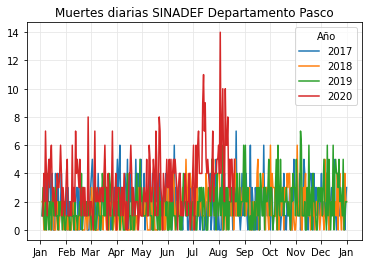

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Piura


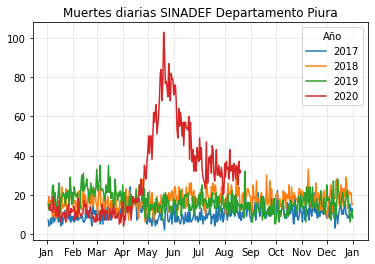

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Puno


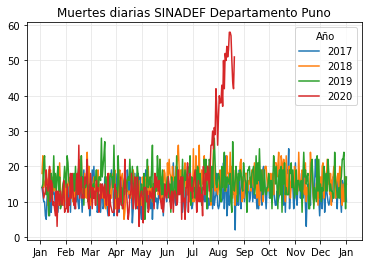

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

San Martin


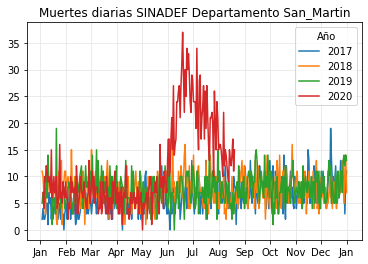

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tacna


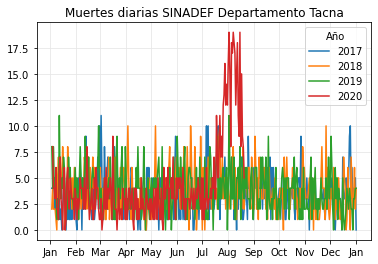

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tumbes


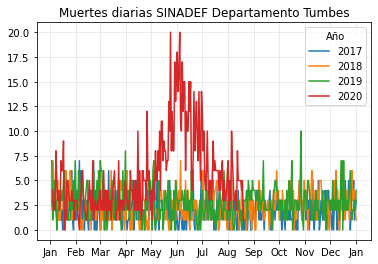

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ucayali


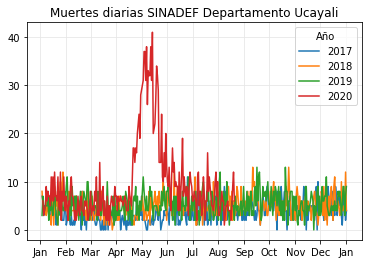

In [120]:
estado_Peru = True

#Peru

if estado_Peru == True:
  df_fecha_contadas_Peru.to_numpy()
  fecha_contadas=df_fecha_contadas_Peru-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.date(2017,1,1) ####
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Perú')
  plt.savefig("Sinadef_SinFiltro_Perú.png")
  files.download("Sinadef_SinFiltro_Perú.png")
  print('Perú')
  plt.show()
else:
  print('Peru null. Si esto sale algo esta muy mal. Nunca deberia salir')

#Amazonas 

if estado_Amazonas == True:
  df_fecha_contadas_Amazonas.to_numpy()
  fecha_contadas=df_fecha_contadas_Amazonas-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Amazonas')
  plt.savefig("Sinadef_SinFiltro_Amazonas.png")
  files.download("Sinadef_SinFiltro_Amazonas.png")
  print('Amazonas')
  plt.show()
else:
  print('Amazonas null')

#Ancash 

if estado_Ancash == True:
  df_fecha_contadas_Ancash.to_numpy()
  fecha_contadas=df_fecha_contadas_Ancash-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Ancash')
  plt.savefig("Sinadef_SinFiltro_Ancash.png")
  files.download("Sinadef_SinFiltro_Ancash.png")
  print('Ancash')
  plt.show()
else:
  print('Ancash null')

#Apurimac

if estado_Apurimac == True:
  df_fecha_contadas_Apurimac.to_numpy()
  fecha_contadas=df_fecha_contadas_Apurimac-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Apurimac')
  plt.savefig("Sinadef_SinFiltro_Apurimac.png")
  files.download("Sinadef_SinFiltro_Apurimac.png")
  print('Apurimac')
  plt.show()
else:
  print('Apurimac null')

#Arequipa 

if estado_Arequipa == True:
  df_fecha_contadas_Arequipa.to_numpy()
  fecha_contadas=df_fecha_contadas_Arequipa-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Arequipa')
  plt.savefig("Sinadef_SinFiltro_Arequipa.png")
  files.download("Sinadef_SinFiltro_Arequipa.png")
  print('Arequipa')
  plt.show()
else:
  print('Arequipa null')

#Ayacucho

if estado_Ayacucho  == True:
  df_fecha_contadas_Ayacucho.to_numpy()
  fecha_contadas=df_fecha_contadas_Ayacucho-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Ayacucho ')
  plt.savefig("Sinadef_SinFiltro_Ayacucho .png")
  files.download("Sinadef_SinFiltro_Ayacucho .png")
  print('Ayacucho')
  plt.show()
else:
  print('Ayacucho null')
  
#Cajamarca

if estado_Cajamarca  == True:
  df_fecha_contadas_Cajamarca.to_numpy()
  fecha_contadas=df_fecha_contadas_Cajamarca-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Cajamarca ')
  plt.savefig("Sinadef_SinFiltro_Cajamarca .png")
  files.download("Sinadef_SinFiltro_Cajamarca .png")
  print('Cajamarca')
  plt.show()
else:
  print('Cajamarcan null')

#Callao

if estado_Callao  == True:
  df_fecha_contadas_Callao.to_numpy()
  fecha_contadas=df_fecha_contadas_Callao-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Callao ')
  plt.savefig("Sinadef_SinFiltro_Callao .png")
  files.download("Sinadef_SinFiltro_Callao .png")
  print('Callao')
  plt.show()
else:
  print('Callaon null')

#Cusco

if estado_Cusco  == True:
  df_fecha_contadas_Cusco.to_numpy()
  fecha_contadas=df_fecha_contadas_Cusco-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Cusco ')
  plt.savefig("Sinadef_SinFiltro_Cusco .png")
  files.download("Sinadef_SinFiltro_Cusco .png")
  print('Cusco')
  plt.show()
else:
  print('Cuscon null')

#Hancavelica

if estado_Huancavelica  == True:
  df_fecha_contadas_Huancavelica .to_numpy()
  fecha_contadas=df_fecha_contadas_Huancavelica-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Huancavelica ')
  plt.savefig("Sinadef_SinFiltro_Huancavelica .png")
  files.download("Sinadef_SinFiltro_Huancavelica .png")
  print('Huancavelica')
  plt.show()
else:
  print('Huancavelican null')

#Huanuco

if estado_Huanuco  == True:
  df_fecha_contadas_Huanuco.to_numpy()
  fecha_contadas=df_fecha_contadas_Huanuco-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Huanuco ')
  plt.savefig("Sinadef_SinFiltro_Huanuco .png")
  files.download("Sinadef_SinFiltro_Huanuco .png")
  print('Huanuco')
  plt.show()
else:
  print('Huanuco null')

#Ica 
if estado_Ica  == True:
  df_fecha_contadas_Ica.to_numpy()
  fecha_contadas=df_fecha_contadas_Ica-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Ica ')
  plt.savefig("Sinadef_SinFiltro_Ica .png")
  files.download("Sinadef_SinFiltro_Ica .png")
  print('Ica')
  plt.show()
else:
  print('Ica null')

#Junin

if estado_Junin  == True:
  df_fecha_contadas_Junin.to_numpy()
  fecha_contadas=df_fecha_contadas_Junin-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Junin ')
  plt.savefig("Sinadef_SinFiltro_Junin .png")
  files.download("Sinadef_SinFiltro_Junin .png")
  print('Junin')
  plt.show()
else:
  print('Junin null')

#La Libertad

if estado_La_Libertad  == True:
  df_fecha_contadas_La_Libertad.to_numpy()
  fecha_contadas=df_fecha_contadas_La_Libertad-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento La Libertad ')
  plt.savefig("Sinadef_SinFiltro_La_Libertad.png")
  files.download("Sinadef_SinFiltro_La_Libertad.png")
  print('La Libertad')
  plt.show()
else:
  print('La Libertad null')

#Lambayeque

if estado_Lambayeque == True:
  df_fecha_contadas_Lambayeque.to_numpy()
  fecha_contadas=df_fecha_contadas_Lambayeque-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Lambayeque')
  plt.savefig("Sinadef_SinFiltro_Lambayeque.png")
  files.download("Sinadef_SinFiltro_Lambayeque.png")
  print('Lambayeque')
  plt.show()
else:
  print('Lambayeque null')

#Lima

if estado_Lima == True:

  df_fecha_contadas_Lima.to_numpy()
  fecha_contadas=df_fecha_contadas_Lima-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Lima')
  plt.savefig("Sinadef_SinFiltro_Lima.png")
  files.download("Sinadef_SinFiltro_Lima.png")
  print('Lima')
  plt.show()

else:
  print('Lima null')

#Loreto

if estado_Loreto == True:
  df_fecha_contadas_Loreto.to_numpy()
  fecha_contadas=df_fecha_contadas_Loreto-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Loreto')
  plt.savefig("Sinadef_SinFiltro_Loreto.png")
  files.download("Sinadef_SinFiltro_Loreto.png")
  print('Loreto')
  plt.show()
else:
  print('Loreto null')

#Madre de Dios
if estado_Madre_De_Dios  == True:
  df_fecha_contadas_Madre_De_Dios.to_numpy()
  fecha_contadas=df_fecha_contadas_Madre_De_Dios-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Madre_De_Dios ')
  plt.savefig("Sinadef_SinFiltro_Madre_De_Dios .png")
  files.download("Sinadef_SinFiltro_Madre_De_Dios .png")
  print('Madre_De_Dios')
  plt.show()
else:
  print('Madre_De_Dios null')

#Moquegua
if estado_Moquegua == True:
  df_fecha_contadas_Moquegua.to_numpy()
  fecha_contadas=df_fecha_contadas_Moquegua-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Moquegua')
  plt.savefig("Sinadef_SinFiltro_Moquegua.png")
  files.download("Sinadef_SinFiltro_Moquegua.png")
  print('Moquegua')
  plt.show()
else:
  print('Moquegua null') 

#Pasco

if estado_Pasco == True:
  df_fecha_contadas_Pasco.to_numpy()
  fecha_contadas=df_fecha_contadas_Pasco-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Pasco')
  plt.savefig("Sinadef_SinFiltro_Pasco.png")
  files.download("Sinadef_SinFiltro_Pasco.png")
  print('Pasco')
  plt.show()
else:
  print('Pasco null')

#Piura
if estado_Piura == True:
  df_fecha_contadas_Piura.to_numpy()
  fecha_contadas=df_fecha_contadas_Piura-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Piura')
  plt.savefig("Sinadef_SinFiltro_Piura.png")
  files.download("Sinadef_SinFiltro_Piura.png")
  print('Piura')
  plt.show()
else:
  print('Piura null')

#Puno

if estado_Puno == True:
  df_fecha_contadas_Puno.to_numpy()
  fecha_contadas=df_fecha_contadas_Puno-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Puno')
  plt.savefig("Sinadef_SinFiltro_Puno.png")
  files.download("Sinadef_SinFiltro_Puno.png")
  print('Puno')
  plt.show()
else:
  print('Puno null')
  
#San_Martin

if estado_San_Martin == True:
  df_fecha_contadas_San_Martin.to_numpy()
  fecha_contadas=df_fecha_contadas_San_Martin-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento San_Martin')
  plt.savefig("Sinadef_SinFiltro_San_Martin.png")
  files.download("Sinadef_SinFiltro_San_Martin.png")
  print('San Martin')
  plt.show()
else:
  print('San Martin null')

#Tacna

if estado_Tacna == True:
  df_fecha_contadas_Tacna.to_numpy()
  fecha_contadas=df_fecha_contadas_Tacna-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Tacna')
  plt.savefig("Sinadef_SinFiltro_Tacna.png")
  files.download("Sinadef_SinFiltro_Tacna.png")
  print('Tacna')
  plt.show()
else:
  print('Tacna null')

#Tumbes
if estado_Tumbes == True:
  df_fecha_contadas_Tumbes.to_numpy()
  fecha_contadas=df_fecha_contadas_Tumbes-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Tumbes')
  plt.savefig("Sinadef_SinFiltro_Tumbes.png")
  files.download("Sinadef_SinFiltro_Tumbes.png")
  print('Tumbes')
  plt.show()
else:
  print('Tumbes null')

#Ucayali

if estado_Ucayali == True:
  df_fecha_contadas_Ucayali.to_numpy()
  fecha_contadas=df_fecha_contadas_Ucayali-1
  muertes_2017=fecha_contadas[0:365]
  muertes_2018=fecha_contadas[365:730]
  muertes_2019=fecha_contadas[731:1096]
  muertes_2020=fecha_contadas[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Departamento Ucayali')
  plt.savefig("Sinadef_SinFiltro_Ucayali.png")
  files.download("Sinadef_SinFiltro_Ucayali.png")
  print('Ucayali')
  plt.show()
else:
  print('Ucayali null')  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Perú


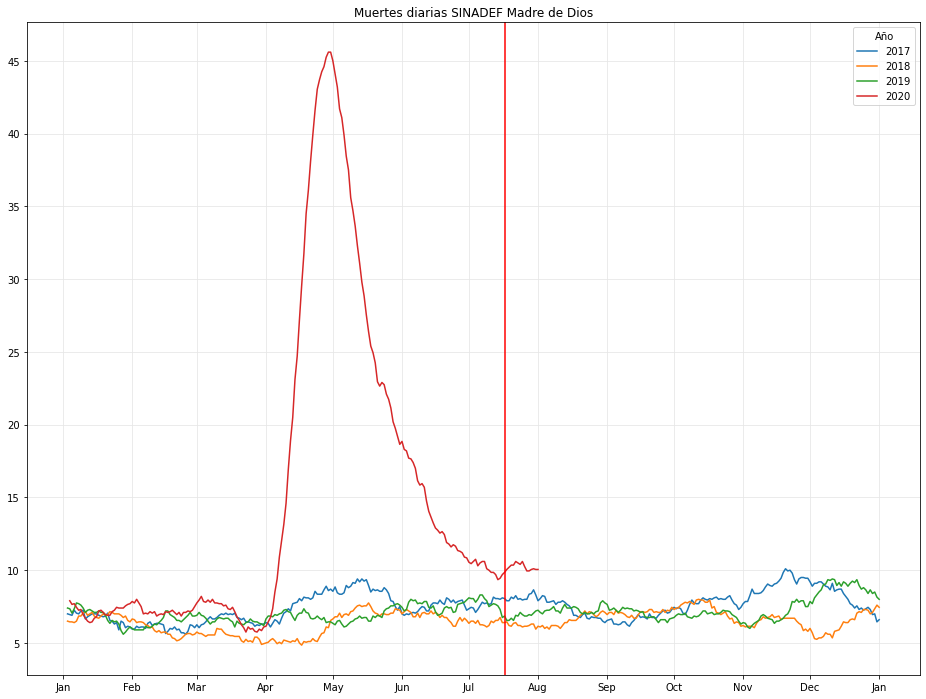

In [240]:
lista_departamentos = ['AMAZONAS','ANCASH','APURIMAC','AREQUIPA','AYACUCHO','CAJAMARCA','CALLAO','CUSCO','HUANCAVELICA','HUANUCO','ICA','JUNIN','LA LIBERTAD','LAMBAYEQUE','LIMA','LORETO','MADRE DE DIOS','MOQUEGUA','PASCO','PIURA','PUNO','SAN MARTIN','TACNA','TUMBES','UCAYALI']

mylist = df_fecha_contadas_Loreto
N = 20
#filtro de N dias
cumsum, moving_aves = [0], []
for i, x in enumerate(mylist, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
        GA=moving_aves

if estado_Peru == True:
  df_fecha_contadas_Peru.to_numpy()
  muertes_2017=GA[0:365]
  muertes_2018=GA[365:730]
  muertes_2019=GA[731:1096]
  muertes_2020=GA[1096:]
  cantidad_dias_ano_2020=len(muertes_2020)
  numdays = 365
  base = datetime.datetime(2017,1,1)
  date_list = [base - datetime.timedelta(days=x) for x in range(0, numdays)]
  locator = mdates.MonthLocator()  
  fmt = mdates.DateFormatter('%b')
  a2017_temporal=muertes_2017[::-1]
  a2018_temporal=muertes_2018[::-1]
  a2019_temporal=muertes_2019[::-1]
  a2020_temporal=muertes_2020[::-1]
  numero_dias_ignorados=int(1) 
  a2020_temporal=a2020_temporal[numero_dias_ignorados:len(a2020_temporal)]
  a=int(365-len(muertes_2020))
  date_list_2020 = [base - datetime.timedelta(days=x) for x in range(a+0, -numero_dias_ignorados+a+len(muertes_2020))]
  plt.figure(figsize=(16,12))
  plt.plot(date_list,     a2017_temporal,label='2017')
  plt.plot(date_list,     a2018_temporal,label='2018')
  plt.plot(date_list,     a2019_temporal,label='2019')
  plt.plot(date_list_2020,a2020_temporal,label='2020')


  plt.axvline(pd.Timestamp('2016-07-17'),color='r')
  
  X = plt.gca().xaxis
  X.set_major_locator(locator)
  X.set_major_formatter(fmt)
  plt.grid(axis='both', color='0.9')
  plt.legend(title='Año')
  plt.title('Muertes diarias SINADEF Madre de Dios')
  plt.savefig("Sinadef_SinFiltro_Lima.png")
  files.download("Sinadef_SinFiltro_Perú.png")
  print('Perú')
  plt.show()

else:
  print('Peru null. Si esto sale algo esta muy mal. Nunca deberia salir')